## 활성화 함수

### sigmoid 함수

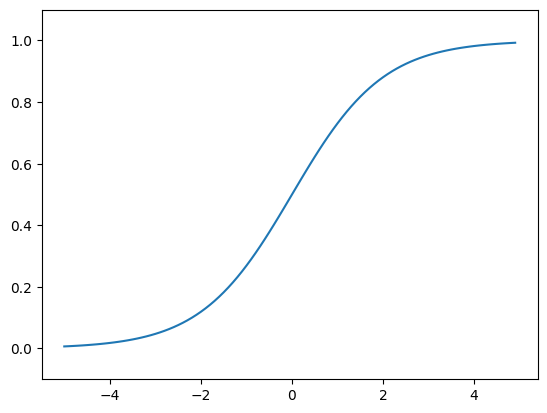

In [17]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### Tanh 함수

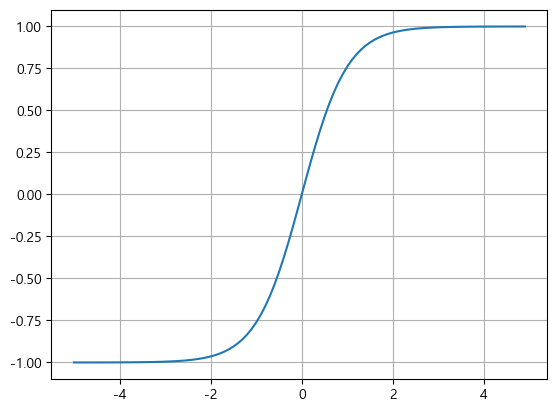

In [8]:
def tanh(x):
    return np.tanh(x)

x = np.arange(-5.0,5.0,0.1)
y = tanh(x)
plt.plot(x,y)
plt.ylim(-1.1,1.1)
plt.grid()
plt.show()

### ReLU 함수

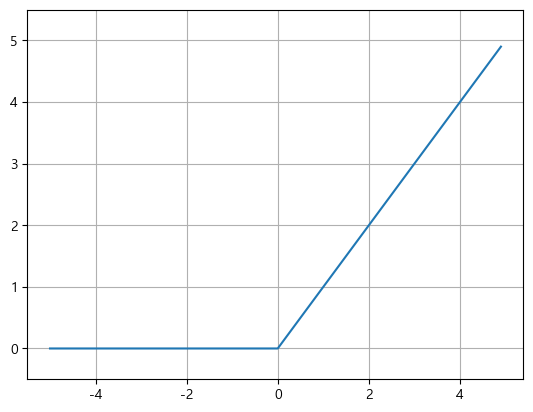

In [10]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.5,5.5)
plt.grid()
plt.show()

## 텐서플로우(tensorflow)

### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = "{:.2f}".format

In [59]:
# 1. 데이터 준비
# x_data: 입력 데이터, y_data: 실제 값 (정답)
x_data = np.array([0,1,2,3,4], dtype=np.float32)
y_data = np.array([1,3,5,7,9], dtype=np.float32)

In [60]:
# 2. 모델 정의
# 가중치(w)와 편향(b)를 변수로 정의
w = tf.Variable(0.0) # 초기가중치
b = tf.Variable(0.0) # 초기 편향

In [61]:
# 예측 함수 (y = wx + b)
def predict(x):
    return w * x + b

In [62]:
# 3. 손실 함수 정의
# 평균 제곱 오차 (Mean Squared Error, MSE) 사용
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred)) # reduce_mean : 제곱한 오차(tf.square(y_true-y_pred)들의 평균

In [63]:
# 4. 최적화 알고리즘 선택
optimizer = tf.optimizers.SGD(learning_rate=0.01) # 경사하강법

In [64]:
# 5. 학습 과정
for step in range(600):  # 100번 반복
    with tf.GradientTape() as tape:
        y_pred = predict(x_data)  # 예측값
        loss = loss_fn(y_data, y_pred)  # 손실 계산

    # 가중치와 편향에 대한 경사도 계산 및 업데이트
    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if step % 10 == 0:  # 10번마다 로그 출력
        print(f"Step {step}, Loss: {loss.numpy()}, w: {w.numpy()}, b: {b.numpy()}")

Step 0, Loss: 33.0, w: 0.2800000011920929, b: 0.09999999403953552
Step 10, Loss: 1.8755830526351929, w: 1.6574040651321411, b: 0.6004058718681335
Step 20, Loss: 0.1229294165968895, w: 1.9802603721618652, b: 0.7298945188522339
Step 30, Loss: 0.02239181473851204, w: 2.053251266479492, b: 0.7707916498184204
Step 40, Loss: 0.014991003088653088, w: 2.0671944618225098, b: 0.7900874018669128
Step 50, Loss: 0.013025244697928429, w: 2.0673303604125977, b: 0.8037028312683105
Step 60, Loss: 0.011540031060576439, w: 2.06437611579895, b: 0.8154456615447998
Step 70, Loss: 0.010236968286335468, w: 2.0608623027801514, b: 0.8262498378753662
Step 80, Loss: 0.009081726893782616, w: 2.0573794841766357, b: 0.8363654017448425
Step 90, Loss: 0.00805690512061119, w: 2.0540578365325928, b: 0.8458786010742188
Step 100, Loss: 0.007147765718400478, w: 2.050919771194458, b: 0.854835569858551
Step 110, Loss: 0.006341210100799799, w: 2.047961473464966, b: 0.863271176815033
Step 120, Loss: 0.005625654477626085, w: 2.

In [65]:
# 6. 예측 및 결과 확인
print("Final Parameters:", f"w={w.numpy()}, b={b.numpy()}")
print("Prediction for x=5:", f"{predict(5).numpy()}")

Final Parameters: w=2.0025675296783447, b=0.9926806688308716
Prediction for x=5: 11.005517959594727


### keras를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [158]:
# 1. 데이터 준비
# 입력(x)과 출력(y) 데이터를 정의합니다.
x_data = np.array([0,1,2,3,4], dtype=np.float32)
y_data = np.array([1,3,5,7,9], dtype=np.float32)

In [159]:
# 2. 모델 정의
# Sequential API를 사용해 신경망을 정의합니다.
model = Sequential([
    Dense(1,input_dim=1)
])

c:\pythonEdu\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
# 3. 모델 컴파일
# 손실 함수와 옵티마이저를 설정합니다.
model.compile(optimizer='sgd', loss='mse')

In [161]:
# 4. 모델 학습
# fit() 메서드로 데이터를 학습시킵니다.
model.fit(x_data,y_data,epochs=250,verbose=1)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 7.3024
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.5107
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4.1666
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.1583
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.4017
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.8340
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.4079
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.0879
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.8476
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6670
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5312
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4290
Epoch 13/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3520
Epoch 14/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2939
Epoch 15/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2500
Epoch 16/250
1/1 ━

In [162]:
# 5. 예측 및 평가
# 새로운 데이터로 예측 수행
x_new = np.array([5], dtype=np.float32)
y_new = model.predict(x_new)
print(f"x = 5일 때, 예측된 y = {y_new[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
x = 5일 때, 예측된 y = 11.11


### MINIST 예제 (CNN모델 예제)

In [1]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# 2. 데이터 로드 및 전처리
# MNIST 데이터셋은 이미 나뉘어 제공 (학습/테스트 데이터)
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [3]:
# MNIST 이미지는 28x28 크기, 채널 정보 추가 (흑백 이미지는 채널 1개, 컬러는 3개)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

In [4]:
# 레이블을 One-Hot Encoding (숫자 0~9를 벡터로 변환)
# One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(y_train.shape) == 1:
    y_train = tf.keras.utils.to_categorical(y_train,10)     # to_categorical(원핫인코딩 대상, 클래스 갯수)
if len(y_test.shape) == 1:
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# 3. CNN 모델 정의
model = models.Sequential()

In [6]:
# 첫 번째 합성곱 계층: 필터 크기 3x3, 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# 풀링 계층: 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2,2)))

c:\pythonEdu\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 두 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [8]:
# 세 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [9]:
# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Flatten())

In [10]:
# Fully Connected Layer 1: 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64, activation='relu'))

In [11]:
# 출력층: 뉴런 수 10(클래스 수), 활성화 함수 Softmax
model.add(layers.Dense(10, activation='softmax'))

In [12]:
# 모델 요약 출력 (구조 확인용)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 4. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# 5. 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8534 - loss: 1.0282 - val_accuracy: 0.9716 - val_loss: 0.1055
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9773 - loss: 0.0707 - val_accuracy: 0.9809 - val_loss: 0.0645
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9849 - loss: 0.0454 - val_accuracy: 0.9800 - val_loss: 0.0670
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9900 - loss: 0.0343 - val_accuracy: 0.9792 - val_loss: 0.0767
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9852 - val_loss: 0.0554


In [15]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0675
테스트 정확도: 0.9848


In [20]:
# 7. 결과 확인: 테스트 데이터에서 임의의 이미지 예측
# 테스트 데이터에서 첫 번째 샘플을 가져옴
sample_image = x_test[0]
sample_label = np.argmax(y_test[0])

In [21]:
# 모델로 예측 수행
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


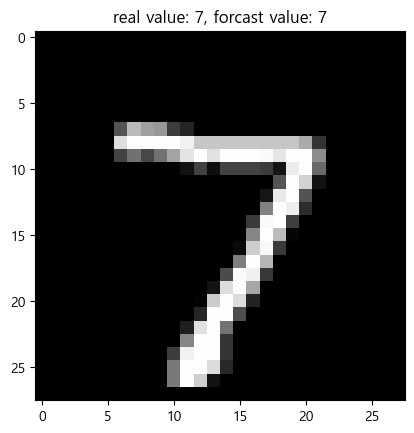

In [22]:
# 결과 출력
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"real value: {sample_label}, forcast value: {predicted_label}")
plt.show()

### 꽃 이미지 분류 및 예측 예제(CNN)

In [23]:
# flower_photo 디렉토리 밑에 daisy, dandelion, roses, sunflowers, tulips 디렉토리 존재, 약 3670개 사진
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow
from tensorflow.keras import layers
import os
import pathlib
import urllib.request
import tarfile

In [25]:
# 데이터 다운로드 함수
def down_and_ext_data():
    # 데이터 URL
    data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    
    # 다운로드할 디렉토리 생성
    down_dir = os.path.join(os.getcwd(),'flower_dataset')
    os.makedirs(down_dir, exist_ok=True)
    
    # 파일 다운로드
    tgz_path = os.path.join(down_dir, 'flower_photos.tgz')
    
    if not os.path.exists(tgz_path):
        print("데이터셋 다운로드중...")
        urllib.request.urlretrieve(data_url, tgz_path)
        print("다운로드 완료!")
        
    # 압축 해제
    if not os.path.exists(os.path.join(down_dir, "flower_photos")):
        print("압축 해제중...")
        with tarfile.open(tgz_path) as tar:
            tar.extractall(path=down_dir)
        print("압축해제 완료!")
        
    return os.path.join(down_dir, "flower_photos")

In [26]:
# 데이터 다운로드 및 경로 설정
data_dir = down_and_ext_data()
data_dir = pathlib.Path(data_dir)

데이터셋 다운로드중...
다운로드 완료!
압축 해제중...
압축해제 완료!


In [27]:
# 클래스 및 이미지 개수 확인
classes = sorted([item.name for item in data_dir.glob('*/') if item.is_dir()])
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"발견된 클래스: {classes}")
print(f"총 이미지 개수: {image_count}")

발견된 클래스: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
총 이미지 개수: 3670


In [28]:
# 각 클래스별 이미지 개수 확인
for class_name in classes:
    class_images = len(list(data_dir.glob(f"{class_name}/*")))
    print(f"{class_name}: {class_images}개 이미지")

daisy: 633개 이미지
dandelion: 898개 이미지
roses: 641개 이미지
sunflowers: 699개 이미지
tulips: 799개 이미지


In [29]:
# 이미지 크기 및 배치 크기 설정
img_h = 180
img_w = 180
bat_size = 32

In [30]:
# 훈련 데이터셋 생성
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_h, img_w),
    batch_size = bat_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [31]:
# 검증 데이터셋 생성
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_h,img_w),
    batch_size=bat_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [32]:
# 클래스 이름 확인
class_names = train_data.class_names
print("클래스: ",class_names)
num_classes = len(class_names)

클래스:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [34]:
# 데이터셋 성능 최적화
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
# 데이터 증강 레이어 정의
data_augm = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

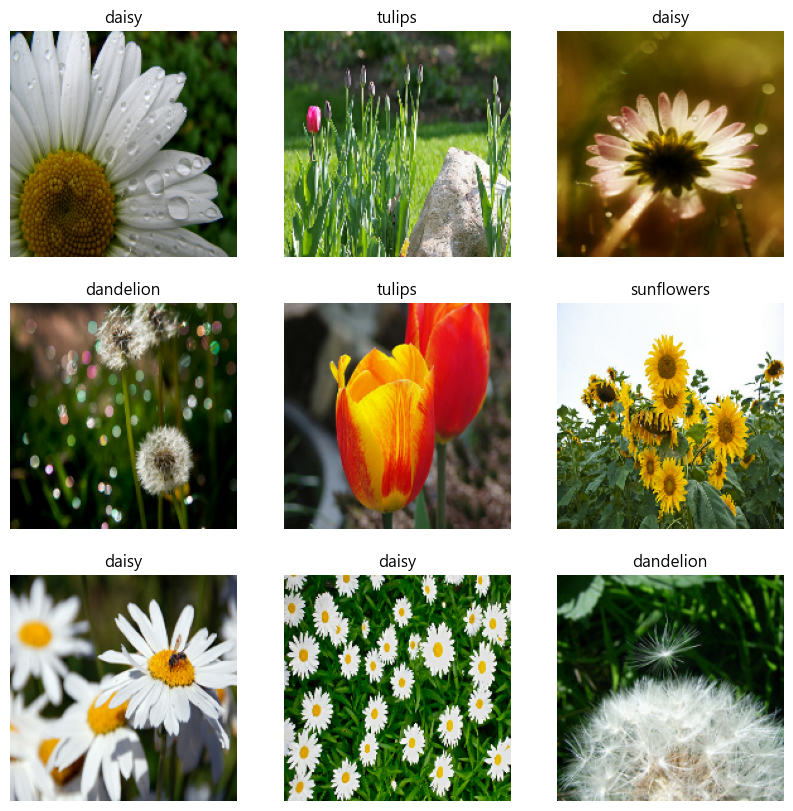

In [38]:
# 샘플 이미지 시각화
plt.figure(figsize=(10,10))
for imgs, lbls in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(class_names[lbls[i]])
        plt.axis("off")
plt.show()
        

In [39]:
# CNN 모델 구성
model = tf.keras.Sequential([
    data_augm,
    layers.Rescaling(1./255, input_shape=(img_h,img_w,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

c:\pythonEdu\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# 모델 컴파일
model.compile(
    optimizer = 'adam',
    loss=tf.losses.SparseCategoricalCrossentropy(),         # 다중클래스에서 주로 사용, 각 클래스별 확률 예측 및 손실계산
    metrics=['accuracy']   
)

In [41]:
# 모델 구조 출력
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Early Stopping 콜백 설정
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
]

In [60]:
# 모델 학습
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = epochs,
    callbacks = callbacks
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.8076 - loss: 0.4901 - val_accuracy: 0.7262 - val_loss: 0.7903
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.8064 - loss: 0.4996 - val_accuracy: 0.7302 - val_loss: 0.8095
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.8210 - loss: 0.4879 - val_accuracy: 0.7439 - val_loss: 0.7722
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.8260 - loss: 0.4617 - val_accuracy: 0.6894 - val_loss: 0.9706
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.7973 - loss: 0.5061 - val_accuracy: 0.7343 - val_loss: 0.7516
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 0.8162 - loss: 0.4684 - val_accuracy: 0.7439 - val_loss: 0.7863
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.8304 - loss: 0.4421 - val_accuracy: 0.7139 - val_loss: 0.9559
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.8459 - loss: 0.4000 - val_accu

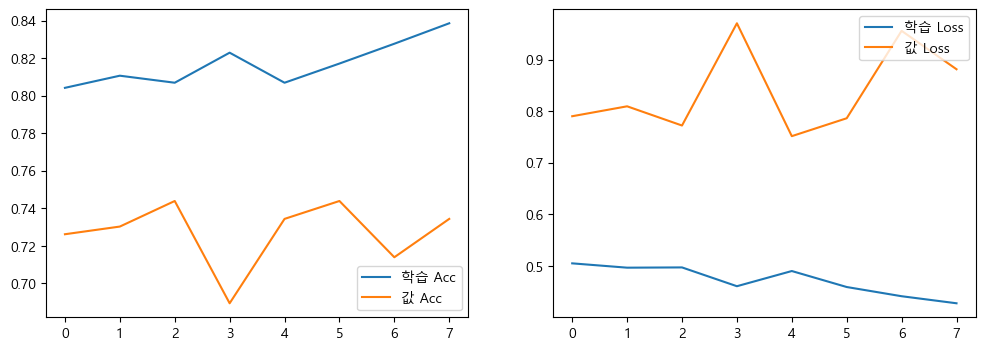

In [61]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='학습 Acc')
plt.plot(epochs_range,val_acc,label='값 Acc')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='학습 Loss')
plt.plot(epochs_range,val_loss,label='값 Loss')
plt.legend(loc='upper right')

In [48]:
# 모델 저장
model.save('./model/flower_classification_model.h5')
print("모델이 'flower_classification_model.h5'로 저장되었습니다.")

모델이 'flower_classification_model.h5'로 저장되었습니다.


In [49]:
# 저장된 모델 불러오기
from  tensorflow.keras.models import load_model

model_path = './model/flower_classification_model.h5'           # 저장된 모델 경로
loaded_model = load_model(model_path)
print("저장된 모델이 성공적으로 로드되었습니다.")

저장된 모델이 성공적으로 로드되었습니다.


In [50]:
# 저장된 모델을 활용한 이미지 예측 함수
def predict_flower_loaded_model(img_path,model,class_names):
    # 이미지 로드 및 전처리
    img = tf.keras.preprocessing.image.load_img(
        img_path,target_size=(img_h,img_w)
    )
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    # 예측 수행
    pred = model.predict(img_arr)
    score = tf.nn.softmax(pred[0])
    # 예측 결과 출력
    print(
        "이 이미지는 '{}' ({:.2f}% 확률) 입니다."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    # 이미지 시각화
    plt.imshow(img),
    plt.axis('off')
    plt.show()

In [54]:
# 테스트 이미지 경로
test_image_path = './flower_dataset/flower_photos/daisy/5547758_eea9edfd54_n.jpg'
#test_image_path = './flower_dataset/flower_photos/roses/12240303_80d87f77a3_n.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
이 이미지는 'daisy' (37.95% 확률) 입니다.


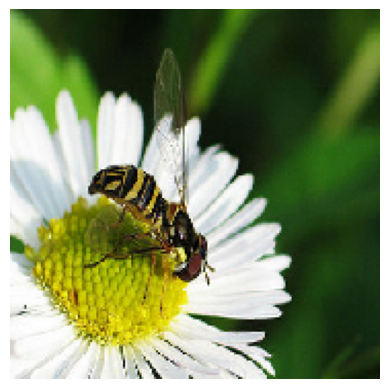

In [55]:
# 예측 실행
predict_flower_loaded_model(test_image_path, loaded_model, class_names)